# Introduction to Neural Networks | Residency 6 | Project 1

### Case Study: Bank Customer Churn Modeling

### Challenge at Hand: Given a Bank customer, can we build a classifier which can determine whether they will leave or not?

###**Connecting Drive with Colab**

In [0]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


###**Load Key Libraries**

In [3]:
# Import Basic Libraries
import numpy as np
import pandas as pd

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Libraries for Train-Test split, Scaling and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Import TensorFlow and Keras
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()
tf.set_random_seed(40)

###**Collect Data**

In [6]:
churndf = pd.read_csv('/content/gdrive/My Drive/AIML/Projects/Datasets/bank.csv')
churndf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Shape of Personal Loan Campaign's Dataset
print("Number of Rows:",churndf.shape[0],"\n")
print("Number of Columns:",churndf.shape[1])

Number of Rows: 10000 

Number of Columns: 14


###**Data Pre-Processing**

In [8]:
# 1 Cleaning any leading/trailing whitespace in the column header
churndf.columns = [x.strip() for x in churndf.columns]
churndf.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

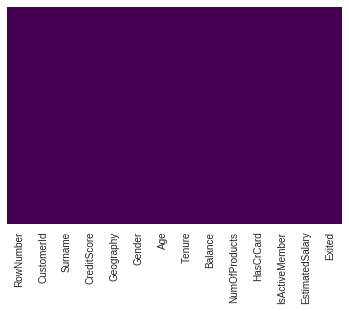

In [9]:
# 2 Missing Value through data visualization
sns.heatmap(churndf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Insights: No missing values in the given dataset

###**Drop the columns which are unique for all users like IDs**

In [10]:
# Dropping Rownumber,Customer ID & Surname Column
churndf.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace = True)
churndf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###** Feature Engineering | Dummy Variable Encoding for Categorical Variables**

In [11]:
# Label Encoding Gender

labelencoder = LabelEncoder()
churndf['Gender'] = labelencoder.fit_transform(churndf['Gender'])

# Dummy Encoding Geography

Geo = pd.get_dummies(churndf['Geography'],prefix = "Geo",prefix_sep = "_",drop_first = True)
churndf.drop(['Geography'],axis = 1,inplace = True)
churndf = pd.concat([churndf,Geo],axis=1)

churndf.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Germany,Geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


###**Distinguish the feature and target set**

In [12]:
churndf.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geo_Germany', 'Geo_Spain'],
      dtype='object')

In [0]:
# Feature Set

X = churndf[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geo_Germany', 'Geo_Spain']]

# Target Set

Y = churndf['Exited']

###**Divide the data set into Train and test sets**

In [14]:
# Dividing the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (7000, 11)
Shape of X Test:	 (3000, 11)
Shape of Y Train:	 (7000,)
Shape of Y Test:	 (3000,)


###** Normalize the train and test data**

Step can be performed during building the graph hence a separate step is not required

###**Initialize &amp; build the model**

**Building the Base Model**

In [15]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize the data
model.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


**Fitting the Model and Predicting**

In [16]:
model.fit(X_train,Y_train,          
          validation_data=(X_test,Y_test),
          epochs=50)

Train on 7000 samples, validate on 3000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
7000/7000 [==============================] - 1s 118us/sample - loss: 0.5996 - acc: 0.6844 - val_loss: 0.5682 - val_acc: 0.7240
Epoch 2/50
7000/7000 [==============================] - 0s 57us/sample - loss: 0.4829 - acc: 0.7787 - val_loss: 0.4542 - val_acc: 0.7950
Epoch 3/50
7000/7000 [==============================] - 0s 58us/sample - loss: 0.4522 - acc: 0.8016 - val_loss: 0.4384 - val_acc: 0.8050
Epoch 4/50
7000/7000 [==============================] - 0s 55us/sample - loss: 0.4421 - acc: 0.8043 - val_loss: 0.4326 - val_acc: 0.8063
Epoch 5/50
7000/7000 [==============================] - 0s 58us/sample - loss: 0.4368 - acc: 0.8090 - val_loss: 0.4301 - val_acc: 0.8067
Epoch 6/50
7000/7000 [==============================] - 0s 58us/sample - loss: 0.4322 - acc: 0.8076 - val_loss: 0.4290 - val_acc: 0.8050
Epoch 7/50
7000/7000 [==============================] - 0s 47us/sample - loss: 0.

In [17]:
#Predicting the Test set results
Y_pred = model.predict(X_test)
Y_pred = Y_pred>0.50
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
# Confusion Matrix
confu = confusion_matrix(Y_test, Y_pred)
confu

array([[2295,   81],
       [ 496,  128]])

In [19]:
accuracy_score(Y_test, Y_pred)

0.8076666666666666

###**Optimize the model**

Optimizing the model with 3 Dense layers with 10,6,4, neurons respectively  using 'sigmoid and output layer with 2 classes 

In [0]:
#Initialize Sequential model
model_nn = tf.keras.models.Sequential()

#Normalize the data
model_nn.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

#Add 1st hidden layer
model_nn.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add 2nd hidden layer
model_nn.add(tf.keras.layers.Dense(6, activation='sigmoid'))

#Add 3rd hidden layer
model_nn.add(tf.keras.layers.Dense(4, activation='sigmoid'))

#Add OUTPUT layer
model_nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile the model
model_nn.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

**Revisit Model**

In [21]:
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1_1 (Ba (None, 11)                44        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 263
Trainable params: 241
Non-trainable params: 22
_________________________________________________________________


###**Fitting the Model and Predicting - Predict the results using 0.5 as a threshold**

In [22]:
model_nn.fit(X_train,Y_train,          
          validation_data=(X_test,Y_test), 
          epochs=50,
          batch_size=30)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 112us/sample - loss: 0.5350 - acc: 0.7981 - val_loss: 0.5198 - val_acc: 0.7920
Epoch 2/50
7000/7000 [==============================] - 1s 76us/sample - loss: 0.5078 - acc: 0.7981 - val_loss: 0.5117 - val_acc: 0.7920
Epoch 3/50
7000/7000 [==============================] - 0s 63us/sample - loss: 0.5034 - acc: 0.7981 - val_loss: 0.5106 - val_acc: 0.7920
Epoch 4/50
7000/7000 [==============================] - 0s 57us/sample - loss: 0.5025 - acc: 0.7981 - val_loss: 0.5105 - val_acc: 0.7920
Epoch 5/50
7000/7000 [==============================] - 0s 57us/sample - loss: 0.5023 - acc: 0.7981 - val_loss: 0.5105 - val_acc: 0.7920
Epoch 6/50
7000/7000 [==============================] - 0s 58us/sample - loss: 0.5023 - acc: 0.7981 - val_loss: 0.5105 - val_acc: 0.7920
Epoch 7/50
7000/7000 [==============================] - 0s 57us/sample - loss: 0.5022 - acc: 0.7981 - val_loss: 0.5105 - val_acc:

In [23]:
#Predicting the Test set results
Y_pred = model_nn.predict(X_test)
Y_pred

array([[0.20006156],
       [0.20167017],
       [0.19858953],
       ...,
       [0.1949884 ],
       [0.19823354],
       [0.20342627]], dtype=float32)

In [24]:
Y_pred = Y_pred>0.50
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

###**Print the Accuracy score and confusion matrix **

In [25]:
# Confusion Matrix
confu = confusion_matrix(Y_test, Y_pred)
confu

array([[2376,    0],
       [ 624,    0]])

In [26]:
# Accuracy

accuracy_score(Y_test, Y_pred)

0.792

###**Optimie the Model with SGD**

In [0]:
#Initialize Sequential model
model_nn = tf.keras.models.Sequential()

#Normalize the data
model_nn.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

#Add 1st hidden layer
model_nn.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add 2nd hidden layer
model_nn.add(tf.keras.layers.Dense(6, activation='sigmoid'))

#Add 3rd hidden layer
model_nn.add(tf.keras.layers.Dense(4, activation='sigmoid'))

#Add OUTPUT layer
model_nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model_nn.compile(optimizer= sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model_nn.fit(X_train,Y_train,          
          validation_data=(X_test,Y_test), 
          epochs=50,
          batch_size=30)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 102us/sample - loss: 0.5070 - acc: 0.7981 - val_loss: 0.5113 - val_acc: 0.7920
Epoch 2/50
7000/7000 [==============================] - 0s 59us/sample - loss: 0.5029 - acc: 0.7981 - val_loss: 0.5115 - val_acc: 0.7920
Epoch 3/50
7000/7000 [==============================] - 0s 58us/sample - loss: 0.5028 - acc: 0.7981 - val_loss: 0.5111 - val_acc: 0.7920
Epoch 4/50
7000/7000 [==============================] - 0s 63us/sample - loss: 0.5027 - acc: 0.7981 - val_loss: 0.5109 - val_acc: 0.7920
Epoch 5/50
7000/7000 [==============================] - 0s 59us/sample - loss: 0.5026 - acc: 0.7981 - val_loss: 0.5107 - val_acc: 0.7920
Epoch 6/50
7000/7000 [==============================] - 0s 57us/sample - loss: 0.5024 - acc: 0.7981 - val_loss: 0.5107 - val_acc: 0.7920
Epoch 7/50
7000/7000 [==============================] - 0s 59us/sample - loss: 0.5023 - acc: 0.7981 - val_loss: 0.5107 - val_acc:

In [29]:
#Predicting the Test set results
Y_pred = model_nn.predict(X_test)
Y_pred = Y_pred>0.50
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
# Confusion Matrix
confu = confusion_matrix(Y_test, Y_pred)
confu

array([[2376,    0],
       [ 624,    0]])

In [31]:
# Accuracy

accuracy_score(Y_test, Y_pred)

0.792